# Monte Carlo Flight Overbooking and Flight Revenue Simulation
## by William W Yee  June 25th, 2019

This document is a simulation of flight overbooking with historical data. First, we will define the problem and goals. Then create a simple mathematical model. Following the mathematical model, we will summarize historical data, by creating statistical distributions, to run an average simulation. Finally, we will use the distributions to create simulation random values to create a distribution of results.

## Problem Definition and Conceputal Model

This problem was present in the Coursera Course : Business Analytics for Decision Making by University of Colorado Boulder

On any given flight, not all passengers complete the process to utilize their purchased seats. In response, airlines typically overbook flights to maximize occupied seats and revenue. However, if the overbooking rate is too high bumped passengers will have to reschedule flights and the overall reputation of the airline will be damaged.

The goal:

* Determine an appropriate overbooking rate, using bumped passengers and revenue cost
* Determine the revenue of any given flight

Givens:
* Historical Data
* Booking Capacity of Plane: 134 passengers
* Price of ticket: 314USD
* Cost to bump passenger: 400USD


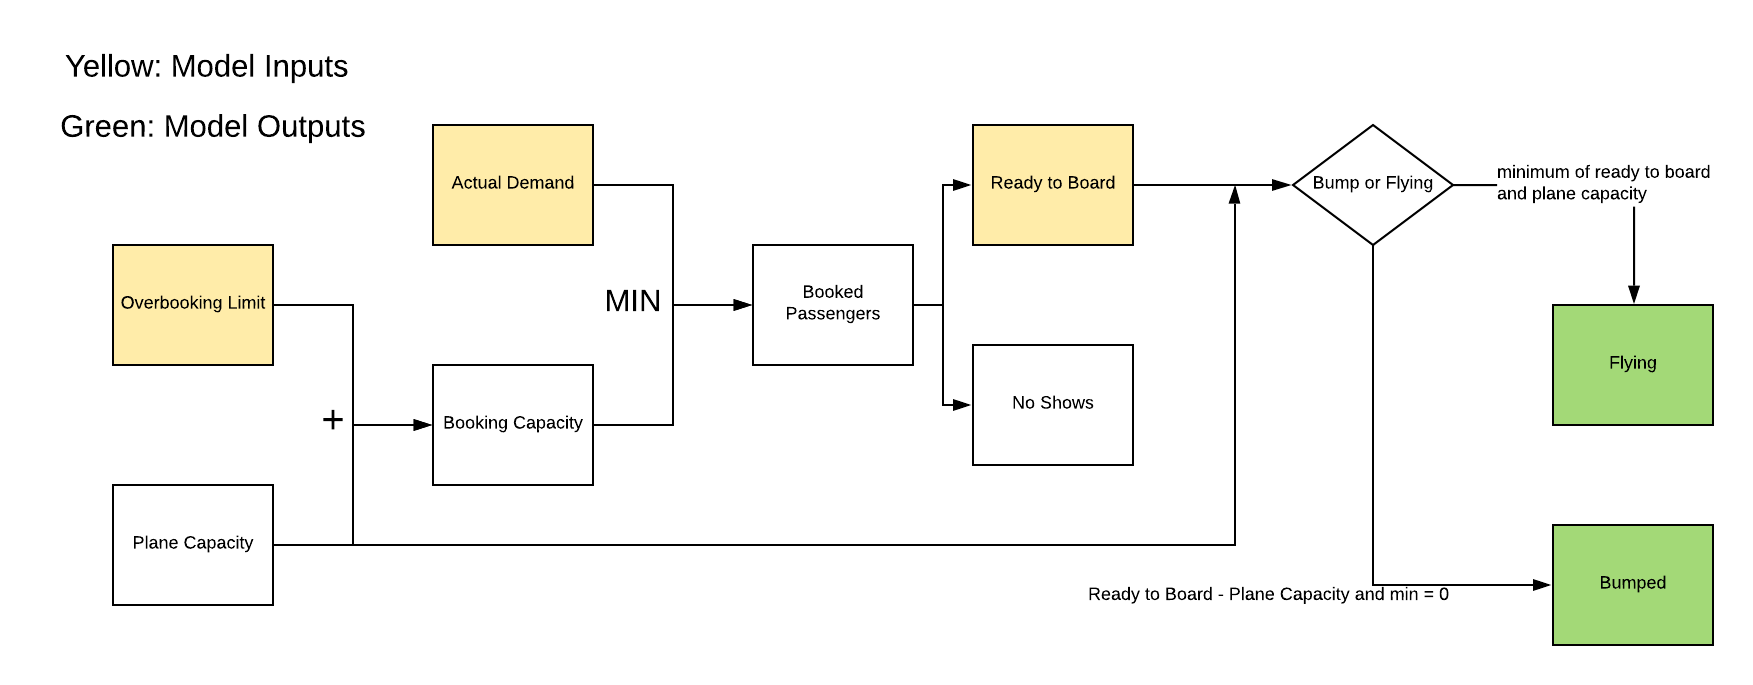

## Historical Data and Statistical Distributions

In [1]:

## Data handling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fitter
from scipy.stats import exponnorm , genlogistic

sns.set_style('whitegrid')
sns.set_context('talk')


In [2]:
hData = pd.read_csv('data/historicalData.csv')

In [3]:
hData.describe()

,Demand,Booked,Shows
count,730.000000,730.000000,730.000000
mean,150.397260,145.323288,133.727397
std,12.275126,6.846314,9.095496
min,117.000000,117.000000,106.000000
25%,142.000000,142.000000,127.000000
50%,150.000000,150.000000,138.000000
75%,158.000000,150.000000,141.000000
max,191.000000,150.000000,147.000000


In [4]:
hData.shape

(730, 4)

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


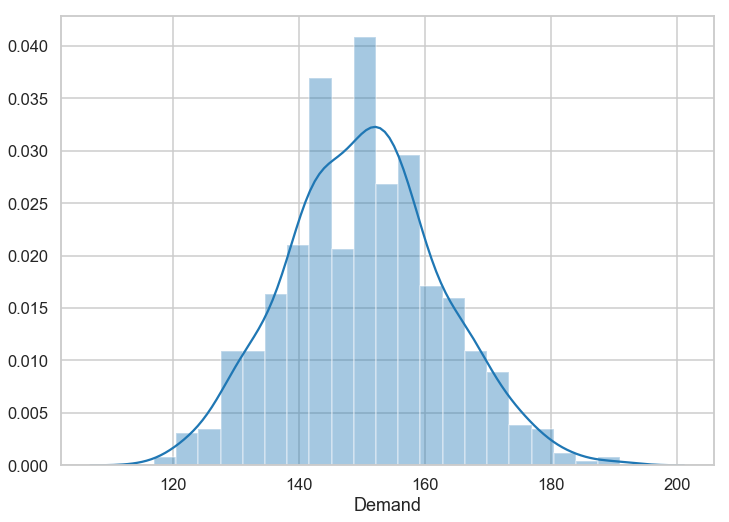

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(hData.Demand)
plt.savefig('images/Demand.png', dpi=300, bboxinches= 'tight')

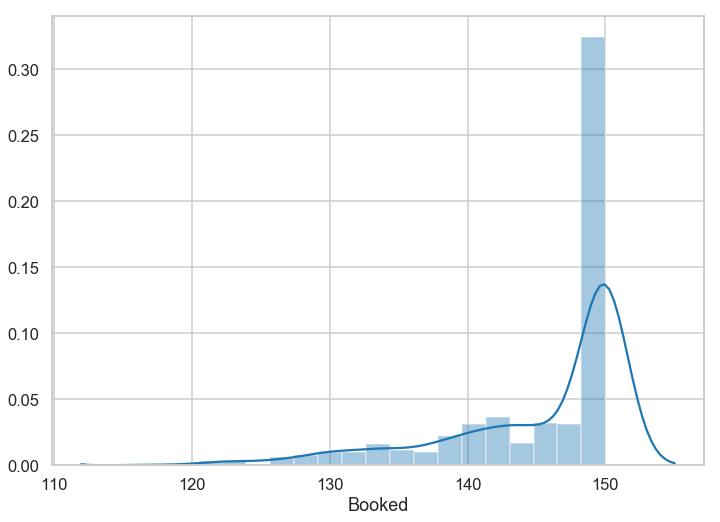

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(hData.Booked)
plt.savefig('images/Booked.png', dpi=300, bboxinches= 'tight')

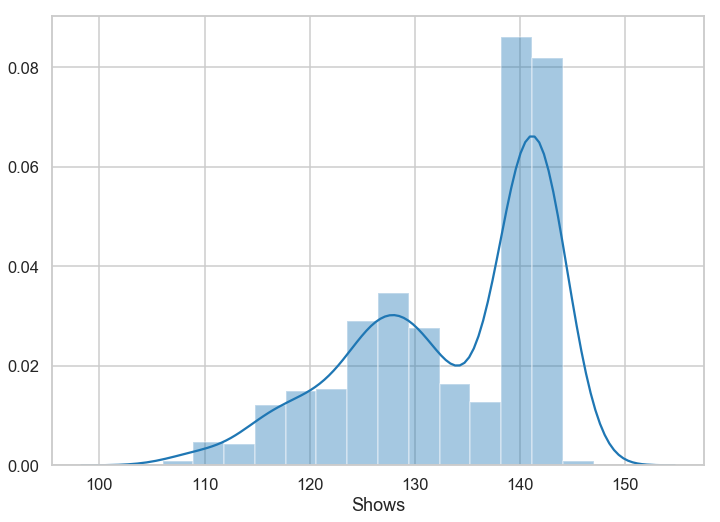

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(hData.Shows)
plt.savefig('images/Shows.png', dpi=300, bboxinches= 'tight')

Let's use the Fitter Package to model the distribution. Fitter uses 80 distributions from scipy to fit distributions and allows you to plot the results for a visual check.

In [8]:
f_demand = fitter.Fitter(hData.Demand, timeout= 100)
f_demand.fit()
f_demand.get_best()

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/fitter/fitter.py:144: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  self.y, self.x = np.histogram(self._data, bins=self.bins, normed=True) # not to show
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


Fitted alpha distribution with error=0.01427091334198139)
Fitted anglit distribution with error=0.01842453793749974)
Fitted arcsine distribution with error=0.04365977508826186)
Fitted argus distribution with error=0.02470956041320526)
Fitted beta distribution with error=0.014249749528762857)
Fitted betaprime distribution with error=0.014225184662928055)
Fitted bradford distribution with error=0.02742135196093014)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:589: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:593: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted burr distribution with error=0.014962599868684683)
Fitted burr12 distribution with error=0.014289245737864246)
Fitted cauchy distribution with error=0.016469853453239956)
Fitted chi distribution with error=0.014233922395705227)
Fitted chi2 distribution with error=0.0142660338536169)
Fitted cosine distribution with error=0.01577810104579252)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 178.5.
  RuntimeWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 175.25.
  RuntimeWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 178.33333333333331.
  RuntimeWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2562: 

Fitted crystalball distribution with error=0.04533678135033324)
Fitted dgamma distribution with error=0.015098517965505015)
Fitted dweibull distribution with error=0.014731808958641119)
Fitted erlang distribution with error=0.014226149977574208)
Fitted expon distribution with error=0.03353581446146877)
Fitted exponnorm distribution with error=0.014214246639477679)
Fitted exponpow distribution with error=0.06703641973370122)
Fitted exponweib distribution with error=0.014632136717437249)
Fitted f distribution with error=0.014225114070894414)
Fitted fatiguelife distribution with error=0.014225382000455308)
Fitted fisk distribution with error=0.014340568374461885)
Fitted foldcauchy distribution with error=0.01644565038584446)
Fitted foldnorm distribution with error=0.023480265252407637)
Fitted frechet_l distribution with error=0.10978867941971243)
Fitted frechet_r distribution with error=0.11071868690981317)
Fitted gamma distribution with error=0.014226150146302463)
Fitted gausshyper distr

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


Fitted genexpon distribution with error=0.018438328078308763)
Fitted genextreme distribution with error=0.014302221368057462)
Fitted gengamma distribution with error=0.014230227950084735)
Fitted genhalflogistic distribution with error=0.036126889204504)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2691: RuntimeWarning: divide by zero encountered in power
  tmp0 = tmp**(limit-1)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2692: RuntimeWarning: invalid value encountered in multiply
  tmp2 = tmp0*tmp
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2159: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted genlogistic distribution with error=0.014314957614439844)
Fitted gennorm distribution with error=0.014236664847659031)
Fitted genpareto distribution with error=0.0351685932833432)
Fitted gilbrat distribution with error=0.027263702869107165)
Fitted gompertz distribution with error=0.2961270412435141)
Fitted gumbel_l distribution with error=0.016268661226992314)
Fitted gumbel_r distribution with error=0.015534354022490062)
Fitted halfcauchy distribution with error=0.031259891137673204)
Fitted halfgennorm distribution with error=0.04987209050596677)
Fitted halflogistic distribution with error=0.02884900461660631)
Fitted halfnorm distribution with error=0.02799536702314772)
Fitted hypsecant distribution with error=0.014594741177655331)
Fitted invgamma distribution with error=0.014268388706183603)
Fitted invgauss distribution with error=0.01453053103342778)
Fitted invweibull distribution with error=0.016316063871260843)
Fitted johnsonsb distribution with error=0.014247875697187759)
F

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wi

Fitted ksone distribution with error=nan)
Fitted kstwobign distribution with error=0.01621515162751558)
Fitted laplace distribution with error=0.01588375982625705)
Fitted levy distribution with error=0.031844102608174725)
Fitted levy_l distribution with error=0.034270616747400826)
SKIPPED levy_stable distribution (taking more than 100 seconds)
Fitted loggamma distribution with error=0.014252637009838183)
Fitted logistic distribution with error=0.014327663655065076)
Fitted loglaplace distribution with error=0.0159079965733394)
Fitted lognorm distribution with error=0.014227465280629414)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3785: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted lomax distribution with error=0.03332431838005876)
Fitted maxwell distribution with error=0.01529671229997211)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4064: RuntimeWarning: overflow encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4064: RuntimeWarning: overflow encountered in multiply
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4064: RuntimeWarning: invalid

Fitted mielke distribution with error=0.014335521934445053)
Fitted moyal distribution with error=0.01689339497730409)
Fitted nakagami distribution with error=0.05366953178517004)
Fitted ncf distribution with error=0.014256988292609452)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4768: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4764: RuntimeWarning: overflow encountered in multiply
  trm1 = np.sqrt(2)*nc*x*sc.hyp1f1(n/2+1, 1.5, valF)


Fitted nct distribution with error=0.014222934234572765)
Fitted ncx2 distribution with error=0.047845148069086955)
Fitted norm distribution with error=0.01423942589442124)
Fitted norminvgauss distribution with error=0.014250032545010382)
Fitted pareto distribution with error=0.03668160685903333)
Fitted pearson3 distribution with error=0.014226145303168881)
Fitted powerlaw distribution with error=0.026977368193008774)
Fitted powerlognorm distribution with error=0.01422202329348416)
Fitted powernorm distribution with error=0.01423586288153598)
Fitted rayleigh distribution with error=0.0180564381442477)
Fitted rdist distribution with error=0.014251587384683427)
Fitted recipinvgauss distribution with error=0.014290341024948647)
Fitted reciprocal distribution with error=0.04533678135033324)
Fitted rice distribution with error=0.014239158752925264)
SKIPPED rv_continuous distribution (taking more than 100 seconds)
SKIPPED rv_histogram distribution (taking more than 100 seconds)
Fitted semicir

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:5823: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:5823: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:5883: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


Fitted tukeylambda distribution with error=0.014241423892005854)
Fitted uniform distribution with error=0.027075276602341866)
Fitted vonmises distribution with error=3.6644950628499506e+57)
Fitted vonmises_line distribution with error=0.014376045035612761)
Fitted wald distribution with error=0.02554222293563843)
Fitted weibull_max distribution with error=0.10978867941971243)
Fitted weibull_min distribution with error=0.11071868690981317)
Fitted wrapcauchy distribution with error=nan)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


{'exponnorm': (0.4319945610366508, 145.53002093494484, 11.26683008052343)}

In [9]:
demand_params = list(f_demand.get_best().values())[0]

In [10]:
f_shows = fitter.Fitter(hData.Shows, timeout =100)
f_shows.fit()
f_shows.get_best()

Fitted alpha distribution with error=0.2542394876006652)
Fitted anglit distribution with error=0.25682948210411255)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/fitter/fitter.py:144: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  self.y, self.x = np.histogram(self._data, bins=self.bins, normed=True) # not to show


Fitted arcsine distribution with error=0.30231704756026195)
Fitted argus distribution with error=0.23273680602648653)
Fitted beta distribution with error=0.2582180667332221)
Fitted betaprime distribution with error=0.2544722162447197)
Fitted bradford distribution with error=0.26468427724935994)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Fitted burr distribution with error=0.2597803634230352)
Fitted burr12 distribution with error=0.24486935288123768)
Fitted cauchy distribution with error=0.24117426194393168)
Fitted chi distribution with error=0.2530402205055764)
Fitted chi2 distribution with error=0.2543144387159258)
Fitted cosine distribution with error=0.2528770446073642)
Fitted crystalball distribution with error=0.3238874893405959)
Fitted dgamma distribution with error=0.22459617454967065)
Fitted dweibull distribution with error=0.23379246969682063)
Fitted erlang distribution with error=0.25345121595000275)
Fitted expon distribution with error=0.29700734233898984)
Fitted exponnorm distribution with error=0.2524121477294234)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.3500000000000005.
  RuntimeWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.233333333333334.
  RuntimeWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.175000000000001.
  RuntimeWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.058333333333334.
  RuntimeWarning)
/Users/williamyee/anaconda3/envs/py

Fitted exponpow distribution with error=0.4071587595035295)
Fitted exponweib distribution with error=0.5406369476841509)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1380: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


Fitted f distribution with error=0.2536431510373953)
Fitted fatiguelife distribution with error=0.2532246234253588)
Fitted fisk distribution with error=0.25463409664908826)
Fitted foldcauchy distribution with error=0.24109399954431962)
Fitted foldnorm distribution with error=0.25233739874343963)
Fitted frechet_l distribution with error=0.6171112600983201)
Fitted frechet_r distribution with error=0.535473406451924)
Fitted gamma distribution with error=0.2535888692684577)
Fitted gausshyper distribution with error=0.22837797873678436)
Fitted genexpon distribution with error=0.26293494070975704)
Fitted genextreme distribution with error=0.23496805570627308)
Fitted gengamma distribution with error=0.5759163443885428)
Fitted genhalflogistic distribution with error=0.25062429219435634)
Fitted genlogistic distribution with error=0.21354782490968371)
Fitted gennorm distribution with error=0.23687839786433618)
Fitted genpareto distribution with error=0.30289652577891274)
Fitted gilbrat distribut

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wi

Fitted ksone distribution with error=nan)
Fitted kstwobign distribution with error=0.2606991480976652)
Fitted laplace distribution with error=0.24736077996953745)
Fitted levy distribution with error=0.294645098558538)
Fitted levy_l distribution with error=0.24460944675291021)
SKIPPED levy_stable distribution (taking more than 100 seconds)
Fitted loggamma distribution with error=0.21753138774549058)
Fitted logistic distribution with error=0.2532842175607837)
Fitted loglaplace distribution with error=0.24778088818121288)
Fitted lognorm distribution with error=0.25250866860671767)
Fitted lomax distribution with error=0.2971331067639068)
Fitted maxwell distribution with error=0.2569666270315676)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


Fitted mielke distribution with error=0.2501736154446797)
Fitted moyal distribution with error=0.2624440882906046)
Fitted nakagami distribution with error=0.3136502334480656)
Fitted ncf distribution with error=0.2541324335722915)


/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4765: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4767: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))


Fitted nct distribution with error=0.253068098401096)
Fitted ncx2 distribution with error=0.3370074934437906)
Fitted norm distribution with error=0.25241181713514244)
Fitted norminvgauss distribution with error=0.2540985125095699)
Fitted pareto distribution with error=0.3036603349202563)
Fitted pearson3 distribution with error=0.23182423173620395)
Fitted powerlaw distribution with error=0.2424298714501917)
Fitted powerlognorm distribution with error=0.30677731376286616)
Fitted powernorm distribution with error=0.2448834474388722)
Fitted rayleigh distribution with error=0.2630236571219582)
Fitted rdist distribution with error=0.2522043986810371)
Fitted recipinvgauss distribution with error=0.2533203963269797)
Fitted reciprocal distribution with error=0.3238874893405959)
Fitted rice distribution with error=0.2524117376165345)
SKIPPED rv_continuous distribution (taking more than 100 seconds)
SKIPPED rv_histogram distribution (taking more than 100 seconds)
Fitted semicircular distribution 

{'genlogistic': (0.03148397254846405, 144.0118676463261, 0.3243429345277982)}

In [11]:
shows_params = list(f_shows.get_best().values())[0]

## Plane Math Model

In [12]:
def Planesim(OverbookingLimit =20):
    PlaneCap = 134
    TicketCost = 314
    BumpCost = 400

    BookingCap = OverbookingLimit + PlaneCap
    AcutalDemand =int(exponnorm.rvs(*demand_params))
    Booked = min(BookingCap,AcutalDemand)


    ReadytoBoard = int(genlogistic.rvs(*shows_params))
    NoShows = Booked - ReadytoBoard


    Flying = min(ReadytoBoard,Booked,PlaneCap)
    Bumped = max(ReadytoBoard-PlaneCap,0)

    Sold = Booked*TicketCost
    Costs = Bumped*BumpCost
    Revenue = Sold-Costs
    return Flying, Bumped, Revenue

In [32]:
flyingPassengers = []
bumpedPassengers = []
revenue = []

for i in range(100000):
    output = Planesim(30)
    flyingPassengers.append(output[0])
    bumpedPassengers.append(output[1])
    revenue.append(output[2])
    

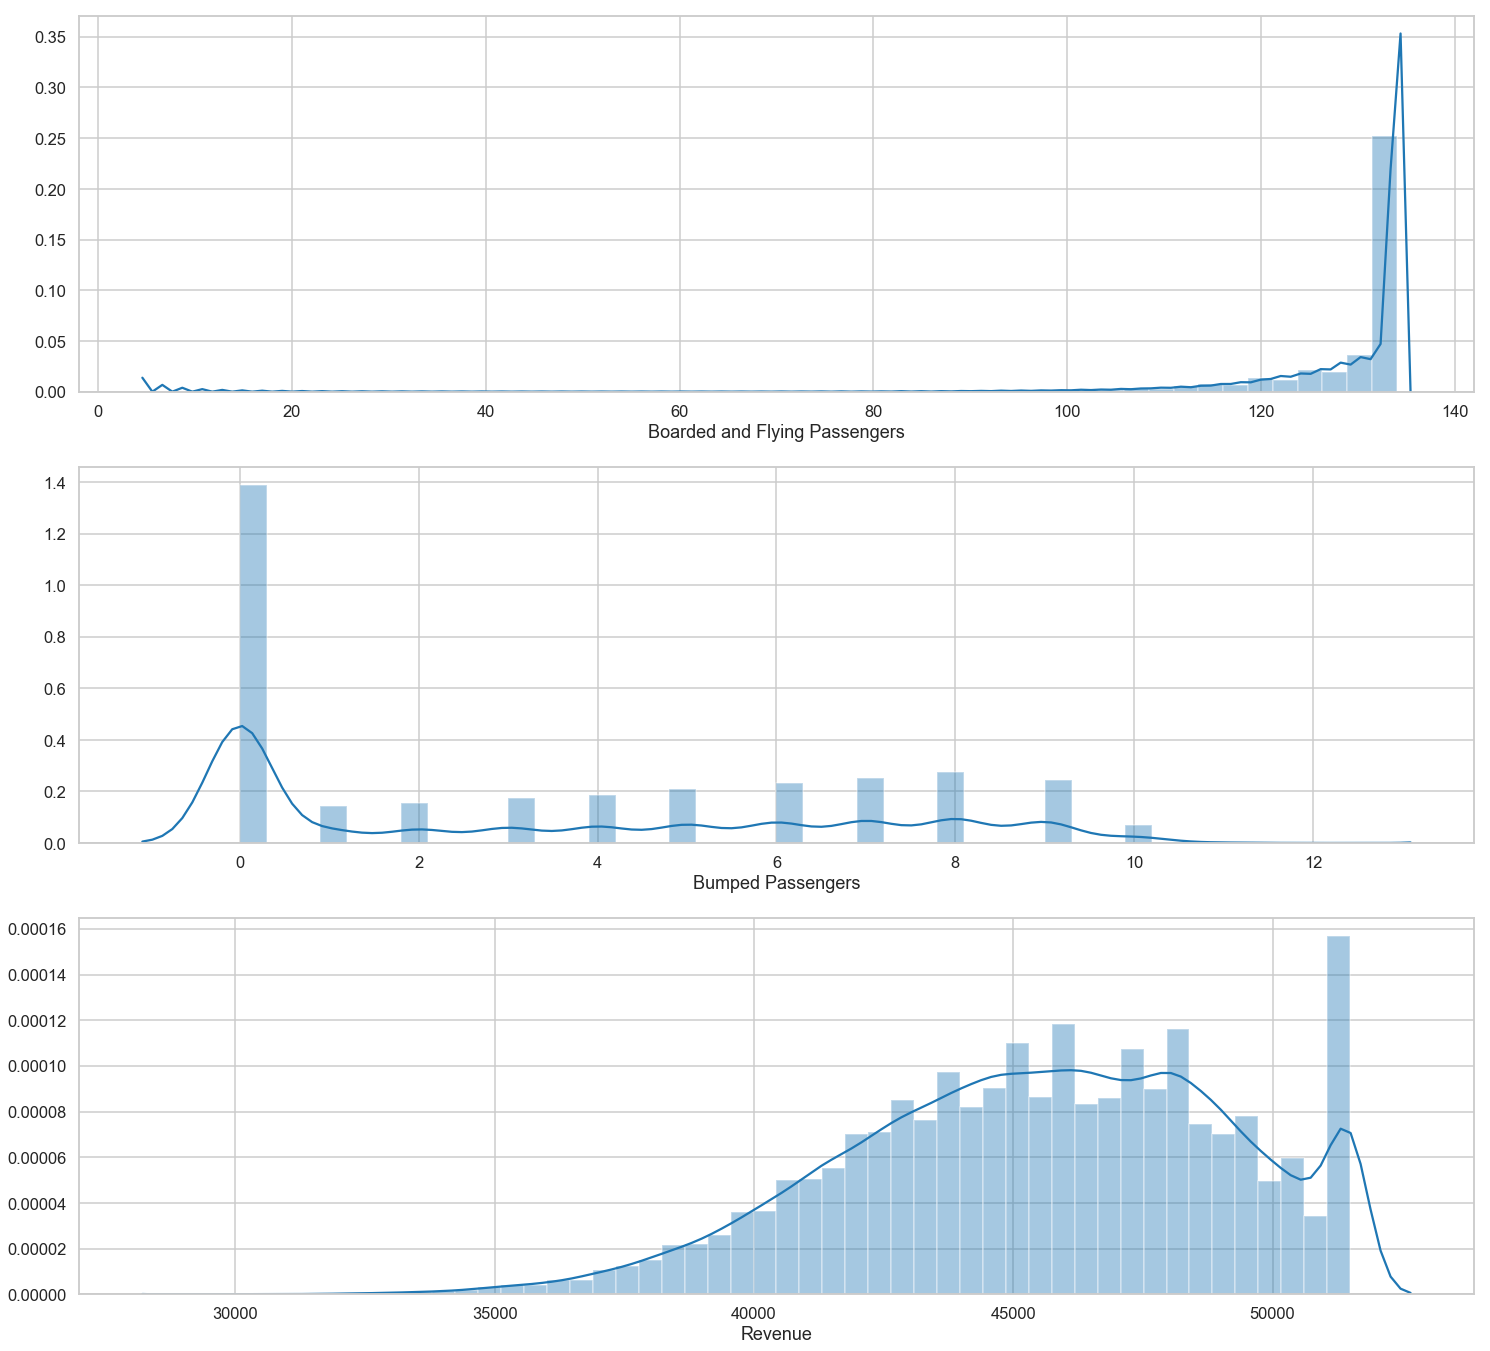

In [33]:
plt.figure(figsize=(25,2))
plt.subplot(3,1,1)
sns.distplot(flyingPassengers)
plt.xlabel('Boarded and Flying Passengers')
plt.subplots_adjust(left=None, bottom= -8, right=None, top=None, wspace=None, hspace=None)



plt.subplot(3,1,2)
sns.distplot(bumpedPassengers)
plt.xlabel('Bumped Passengers')
plt.subplots_adjust(left=None, bottom= -8, right=None, top=None, wspace=None, hspace=None)



plt.subplot(3,1,3)
sns.distplot(revenue)
plt.xlabel('Revenue')
plt.savefig('images/10overbookout.png')

In [34]:
np.mean(revenue)

45487.11566

Let's find the max revenue by iterating through an overbooking limit of 1 to 100.

In [ ]:
expected_rev = []
overbooking_rate = []
for j in range(100):
    flyingPassengers = []
    bumpedPassengers = []
    revenue = []

    for i in range(100000):
        output = Planesim(j)
        flyingPassengers.append(output[0])
        bumpedPassengers.append(output[1])
        revenue.append(output[2])
    overbooking_rate.append(j)
    expected_rev.append(np.mean(revenue))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x=overbooking_rate,y=expected_rev)
plt.savefig('images/optimized.png', dpi=300, bboxinches= 'tight')